# Titanic Dataset Prediction Model - Kaggle Competition

## Introduction

In this Jupyter Notebook, I have explored and built a predictive model for the Titanic dataset, aiming to participate in the Kaggle competition. The sinking of the Titanic is a tragic event in history, and this dataset offers an opportunity to apply machine learning techniques to predict the survival status of passengers based on various features.

### About the Dataset

The Titanic dataset contains information about passengers, including their age, gender, ticket class, and survival status. The challenge posed by the Kaggle competition is to develop models that accurately predict whether a passenger survived or not. The goal is to contribute a submission to the competition and gain insights into the factors influencing passenger survival.

### Notebook Structure

1. **Data Exploration:** I began by delving into the dataset, conducting Exploratory Data Analysis (EDA) through visualizations and statistical summaries to uncover patterns, trends, and potential relationships between features.


2. **Data Preprocessing:** Before feeding the data into a machine learning model, I addressed tasks such as handling missing values, encoding categorical variables, and scaling numerical features.


3. **Feature Engineering:** Exploration of creating new features or transforming existing ones to enhance the predictive power of the model. It has been not done. Still, results are pretty good.


4. **Model Building:** I utilized various machine learning algorithms Random Forest

5. **Model Evaluation:** Performance evaluation of the models using metrics such as accuracy.


6. **Submission:** The final step involves preparing predictions for submission to the Kaggle competition.


Whether you are a beginner looking to learn or an experienced data scientist seeking inspiration, this notebook provides insights into the process of building a predictive model for a real-world problem.

Let's dive in and explore the Titanic dataset!

## Loading Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

## Loading Dataset

In [3]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
df.shape

(891, 12)

## Data Cleaning

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df=df.drop(['Cabin'], axis=1)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [14]:
df["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'McCarthy, Mr. Timothy J',
       'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Fynney, Mr. Joseph J', 'Beesley, Mr. Lawrence',
       'McGowan, Miss. Anna "Annie"', 'Sloper, Mr. William Thompson',
       'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
       'Fortune, Mr. Charles Alexander', 'Uruchurtu

In [15]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [16]:
df["Sex"].replace(["male", "female"], [0, 1], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [17]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '17463', '349909', '347742', '237736', 'PP 9549', '113783',
       'A/5. 2151', '347082', '350406', '248706', '382652', '345763',
       '239865', '248698', '330923', '113788', '347077', '19950',
       'PC 17601', 'C.A. 24579', 'PC 17604', '113789', 'A./5. 2152',
       '345764', '2651', '7546', '11668', 'SC/Paris 2123', '330958',
       '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926', '113509',
       'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144', '2669', '36973',
       '347088', 'C.A. 29395', 'S.P. 3464', '3101281', '315151',
       'C.A. 33111', 'S.O.C. 14879', '2680', '1601', '348123', '248738',
       '364516', '345767', '345779', '113059', 'SO/C 14885', '3101278',
       'W./C. 6608', '343275', '343276', '347466', 'W.E.P. 5734',
       'C.A. 2315', '364500', 'PC 17754', 'PC 17759', '231919', '244367',
       '349245', '35281', '7540', '3101276', '349207', '343120', '349249',
       '110465', '2

In [18]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [19]:
df["Embarked"].replace(["S", "C", "Q"], [0, 1, 2], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [20]:
df=pd.get_dummies(df)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,"Name_Abbing, Mr. Anthony",...,Ticket_STON/O2. 3101282,Ticket_STON/O2. 3101283,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,0,22.0,1,0,7.2500,0,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,1,38.0,1,0,71.2833,1,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,1,26.0,0,0,7.9250,0,False,...,True,False,False,False,False,False,False,False,False,False
3,4,1,1,1,35.0,1,0,53.1000,0,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,0,35.0,0,0,8.0500,0,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df.shape

(712, 1262)

## Dataset Splitting

In [23]:
Y=df["Survived"]
X=df.drop(["Survived"], axis=1)

In [24]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.33, random_state=42)

## Model Development

In [25]:
rf=RandomForestClassifier()
model=rf.fit(X_train, Y_train)

In [26]:
Y_pred=rf.predict(X_test)

## Model Evaluation

In [27]:
false_positive_rate, true_positive_rate, thresholds=roc_curve(Y_test, Y_pred)
roc_auc=auc(false_positive_rate, true_positive_rate)
roc_auc

0.7708333333333333

## Hyperparameter Tuning

In [28]:
# Comparision hyper parameters of Random Forest

n_estimators=[1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results=[]
test_results=[]

for estimator in n_estimators:
    rf=RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, Y_train)
    train_pred=rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds=roc_curve(Y_train, train_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    Y_pred=rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds=roc_curve(Y_test, Y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

## Model Visualization

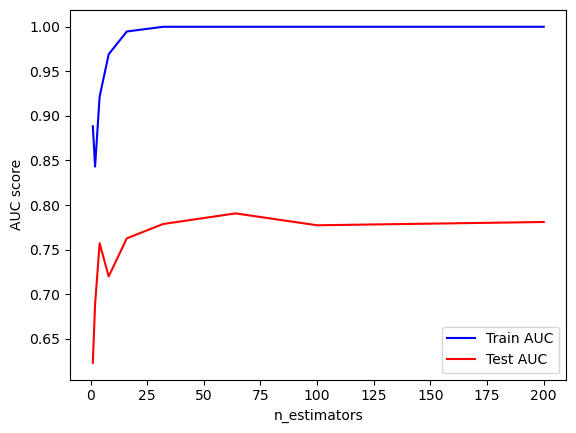

In [30]:
line1 = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line1 = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={'line1': HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

## Conclusion: After 25 n_estimators, there is no significant impact on model performance